## Section 2

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import numpy as np

import tensorflow as tf
tf.__version__

'2.9.0'

In [4]:
scalar = tf.constant(7)
print(scalar)
print(scalar.ndim)

tf.Tensor(7, shape=(), dtype=int32)
0


In [46]:
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Gets different results each time
tf.random.set_seed(5) # global level random seed
tf.random.shuffle(not_shuffled, seed=10) # operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]])>

In [13]:
rank_2_tensor = tf.constant([[2, 3],
                             [4, 5]])
# rank_3_tensor = rank_2_tensor[...,tf.newaxis]
rank_3_tensor = tf.expand_dims(rank_2_tensor, axis=-1)
rank_3_tensor


<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[2],
        [3]],

       [[4],
        [5]]])>

In [23]:
tensor_1 = tf.constant([[1, 2, 3],
                        [4, 5, 6]])
tensor_2 = tf.constant([[7, 8],
                        [9, 10],
                        [11, 12]])

tf.matmul(tensor_1, tensor_2) # the same with 'tf.linalg.matmul(tensor_1, tensor_2)' and 'tensor_1 @ tensor_2'
tf.tensordot(tensor_1, tensor_2, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]])>

In [28]:
print(tf.reshape(tensor_1, (3,2)),'\n')
print(tf.transpose(tensor_1))

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32) 

tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int32)


In [30]:
# Changing the datatype of tensors
tf.cast(tensor_1, dtype=tf.float16)

<tf.Tensor: shape=(2, 3), dtype=float16, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float16)>

In [37]:
np.random.seed(42)
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 8, 24, 67, 87, 79, 48, 10, 94, 52, 98, 53, 66, 98, 14, 34, 24, 15,
       60, 58, 16,  9, 93, 86,  2, 27,  4, 31,  1, 13, 83,  4, 91, 59, 67,
        7, 49, 47, 65, 61, 14, 55, 71, 80,  2, 94, 19, 98, 63, 53, 27])>

In [61]:
print(tf.reduce_min(E))
print(tf.reduce_max(E))
print(tf.reduce_mean(E))
print(tf.reduce_sum(E), '\n')

print(tf.math.reduce_variance(tf.cast(E, dtype=tf.float32)))
print(tf.math.reduce_std(tf.cast(E, dtype=tf.float32)), '\n')

import tensorflow_probability as tfp
print(tfp.stats.variance(E))
print(tfp.stats.stddev(tf.cast(E, dtype=tf.float32)))


tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(98, shape=(), dtype=int32)
tf.Tensor(47, shape=(), dtype=int32)
tf.Tensor(2380, shape=(), dtype=int32) 

tf.Tensor(1001.64, shape=(), dtype=float32)
tf.Tensor(31.648697, shape=(), dtype=float32) 

tf.Tensor(1002, shape=(), dtype=int32)
tf.Tensor(31.648697, shape=(), dtype=float32)


In [62]:
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.24900055, 0.48465526, 0.39165282, 0.8218267 , 0.23590696,
       0.39270067, 0.96157587, 0.7378106 , 0.3086977 , 0.7820475 ,
       0.36411405, 0.43852115, 0.39143312, 0.4100443 , 0.15650964,
       0.16554844, 0.11952579, 0.99199855, 0.07539165, 0.69944966,
       0.3041743 , 0.6850517 , 0.95208406, 0.65089023, 0.48965216,
       0.64302886, 0.50323474, 0.37081254, 0.50158453, 0.65716815,
       0.42388284, 0.6438379 , 0.7099544 , 0.8554728 , 0.10746086,
       0.1302582 , 0.74147284, 0.7842232 , 0.16333139, 0.18595266,
       0.47453701, 0.6588017 , 0.9707295 , 0.62733424, 0.40020967,
       0.9673735 , 0.13458717, 0.6554717 , 0.4056772 , 0.18046606],
      dtype=float32)>

In [66]:
# Finding the positional maximum of a tensor
print(tf.argmax(F))
print(F[tf.argmax(F)])
print(tf.reduce_max(F))

tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(0.99199855, shape=(), dtype=float32)
tf.Tensor(0.99199855, shape=(), dtype=float32)


In [4]:
A = tf.constant([[10, 7],
                 [3, 4],
                 [2, 5]])
A_t = tf.transpose(A)
tf.matmul(A, A_t)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[149,  58,  55],
       [ 58,  25,  26],
       [ 55,  26,  29]])>

## Section 3

### Neural network regression with TensorFlow

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
# one-hot encode DataFrame
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

<AxesSubplot: ylabel='Frequency'>

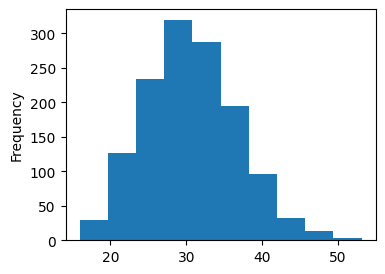

In [50]:
X["bmi"].plot(kind="hist", figsize=(4,3))

In [10]:
# Create a training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [30]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
history_1 = insurance_model.fit(X_train, y_train, epochs=100, verbose=0)


Text(0.5, 0, 'epochs')

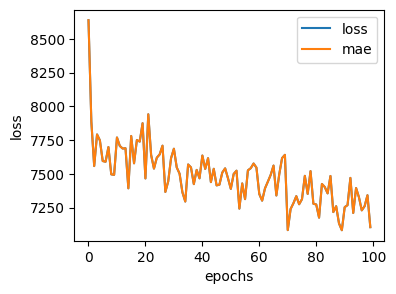

In [55]:
pd.DataFrame(history_1.history).plot(figsize=(4,3))
plt.ylabel("loss")
plt.xlabel("epochs")

In [17]:
# Evaluate model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1000us/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [15]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [32]:
# Improve regeression model
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)


Text(0.5, 0, 'epochs')

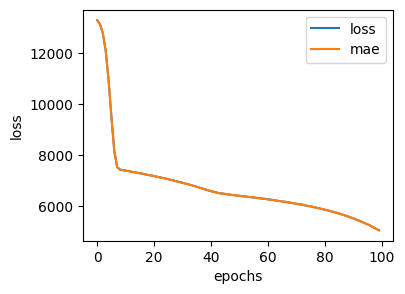

In [54]:
pd.DataFrame(history_2.history).plot(figsize=(4,3))
plt.ylabel("loss")
plt.xlabel("epochs")

In [22]:
# Evaluate model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.4961 - mae: 4924.4961


[4924.49609375, 4924.49609375]

In [57]:
# Improve regeression model
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history_3 = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [71]:
insurance_model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 100)               1200      
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


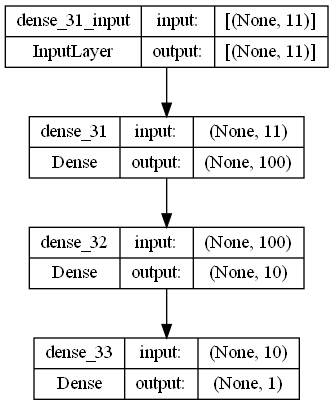

In [72]:
from tensorflow.keras.utils import plot_model

plot_model(insurance_model_3, show_shapes=True)

In [24]:
# Evaluate model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3488.7854 - mae: 3488.7854


[3488.785400390625, 3488.785400390625]

Text(0.5, 0, 'epochs')

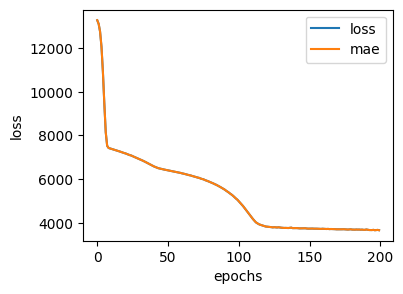

In [58]:
# Plot history (aka a loss curve or a training curve)
pd.DataFrame(history_3.history).plot(figsize=(4,3))
plt.ylabel("loss")
plt.xlabel("epochs")

### Pre-processing data with feature scaling

In [64]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [85]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), (["age", "bmi", "children"])), # turn all values in these column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# ct = make_column_transformer(
#     (StandardScaler(), (["age", "bmi", "children"])), # turn all values in these column between 0 and 1
#     (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
# )

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScale) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [70]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [86]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [87]:
# Improve regeression model
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history_4 = insurance_model_4.fit(X_train_normal, y_train, epochs=100, verbose=0)

Text(0.5, 0, 'epochs')

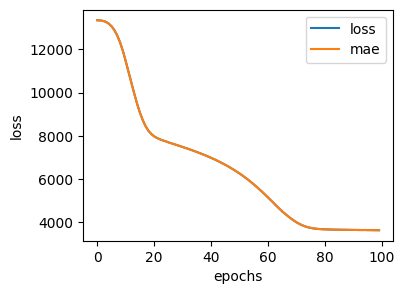

In [88]:
pd.DataFrame(history_4.history).plot(figsize=(4,3))
plt.ylabel("loss")
plt.xlabel("epochs")

In [89]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3438.7842 - mae: 3438.7842


[3438.7841796875, 3438.7841796875]

## Section 4